<a href="https://colab.research.google.com/github/KritikaRazdan/Movie-Review-System/blob/main/Movie_Analysis_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer

import seaborn as sns
import matplotlib.pyplot as plt

from tqdm.auto import tqdm
import time

In [ ]:

data = pd.read_csv("/content/drive/MyDrive/IMDB Dataset.csv")
data
print(data.dtypes)
data.columns
data.describe()

review       object
sentiment    object
dtype: object


,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [ ]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
data.head(3)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive


In [ ]:
data.tail()

,review,sentiment
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative
49999,No one expects the Star Trek movies to be high...,negative


In [ ]:
data.isna().any()

review       False
sentiment    False
dtype: bool

In [ ]:
data.isna().sum()

review       0
sentiment    0
dtype: int64

In [ ]:
data['review'].nunique()

49582

In [ ]:
data.shape

(50000, 2)

In [ ]:
data['review'].drop_duplicates(inplace = True)

In [ ]:
data['review'].nunique()

49582

In [ ]:
data.shape

(50000, 2)

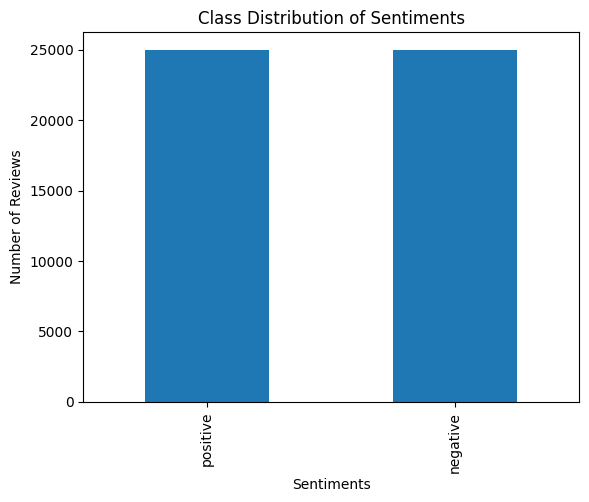

In [ ]:
class_counts = data['sentiment'].value_counts()
class_counts.plot(kind='bar')
plt.title('Class Distribution of Sentiments')
plt.xlabel('Sentiments')
plt.ylabel('Number of Reviews')
plt.show()

In [ ]:
from collections import Counter
import re

import nltk
from nltk.corpus import stopwords

In [ ]:
all_text = ' '.join(data['review'].values)
all_text = re.sub(r'http\S+', '', all_text)
all_text = re.sub(r'@\S+', '', all_text)
all_text = re.sub(r'#\S+', '', all_text)

In [ ]:
words = all_text.split()

In [ ]:
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
words = [word for word in words if not word in stop_words]
words

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['One',
 'reviewers',
 'mentioned',
 'watching',
 '1',
 'Oz',
 'episode',
 'hooked.',
 'They',
 'right,',
 'exactly',
 'happened',
 'me.<br',
 '/><br',
 '/>The',
 'first',
 'thing',
 'struck',
 'Oz',
 'brutality',
 'unflinching',
 'scenes',
 'violence,',
 'set',
 'right',
 'word',
 'GO.',
 'Trust',
 'me,',
 'show',
 'faint',
 'hearted',
 'timid.',
 'This',
 'show',
 'pulls',
 'punches',
 'regards',
 'drugs,',
 'sex',
 'violence.',
 'Its',
 'hardcore,',
 'classic',
 'use',
 'word.<br',
 '/><br',
 '/>It',
 'called',
 'OZ',
 'nickname',
 'given',
 'Oswald',
 'Maximum',
 'Security',
 'State',
 'Penitentary.',
 'It',
 'focuses',
 'mainly',
 'Emerald',
 'City,',
 'experimental',
 'section',
 'prison',
 'cells',
 'glass',
 'fronts',
 'face',
 'inwards,',
 'privacy',
 'high',
 'agenda.',
 'Em',
 'City',
 'home',
 'many..Aryans,',
 'Muslims,',
 'gangstas,',
 'Latinos,',
 'Christians,',
 'Italians,',
 'Irish',
 'more....so',
 'scuffles,',
 'death',
 'stares,',
 'dodgy',
 'dealings',
 'shady',
 '

In [ ]:
word_counts = Counter(words)
top_words = word_counts.most_common(100)
top_words

[('I', 132498),
 ('/><br', 100974),
 ('The', 67317),
 ('movie', 60762),
 ('film', 54277),
 ('one', 41334),
 ('like', 36028),
 ('This', 24329),
 ('would', 23578),
 ('good', 22582),
 ('It', 21475),
 ('really', 21322),
 ('even', 20979),
 ('see', 20364),
 ('-', 18201),
 ('get', 17333),
 ('much', 16827),
 ('story', 16443),
 ('time', 15312),
 ('make', 14859),
 ('could', 14689),
 ('also', 14607),
 ('people', 14414),
 ('great', 14385),
 ('/>The', 14335),
 ('first', 14283),
 ('made', 13418),
 ('think', 13083),
 ('bad', 12847),
 ('many', 12175),
 ('<br', 12028),
 ('never', 11984),
 ('two', 11489),
 ('But', 11435),
 ('little', 11206),
 ('it.', 11116),
 ('way', 11089),
 ('And', 11060),
 ('well', 10789),
 ('watch', 10688),
 ('movie.', 10659),
 ('know', 10656),
 ('seen', 10554),
 ('characters', 10448),
 ('character', 10307),
 ("It's", 10224),
 ('movies', 10118),
 ('love', 10033),
 ('best', 9899),
 ('ever', 9897),
 ('A', 9656),
 ('In', 9482),
 ('films', 9406),
 ('still', 9405),
 ('plot', 9305),
 ('ac

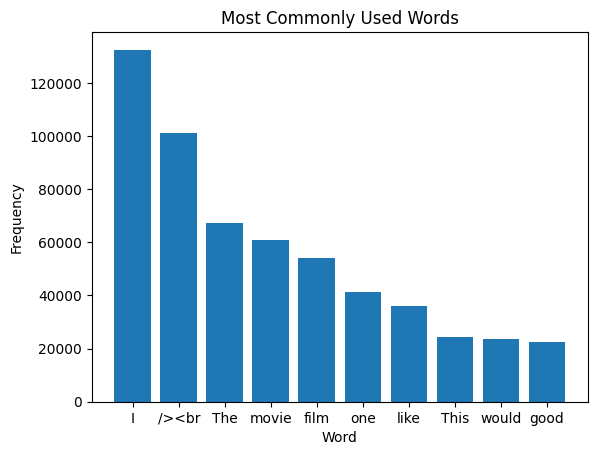

In [ ]:
top_words = word_counts.most_common(10)
x_values = [word[0] for word in top_words]
y_values = [word[1] for word in top_words]
plt.bar(x_values, y_values)
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Most Commonly Used Words')
plt.show()

In [ ]:
def clean_text(text):
    text = re.sub('<.*?>', '', text)

    text = re.sub('[^a-zA-Z]', ' ', text).lower()

    words = nltk.word_tokenize(text)

    words = [w for w in words if w not in stopwords.words('english')]

    stemmer = PorterStemmer()
    words = [stemmer.stem(w) for w in words]

    text = ' '.join(words)
    return text

In [ ]:
import nltk
nltk.download('punkt')

tqdm.pandas()

data['cleaned_text'] = data['review'].progress_apply(clean_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


  0%|          | 0/50000 [00:00<?, ?it/s]

In [ ]:
cv = CountVectorizer(max_features=5000)
X = cv.fit_transform(data['cleaned_text']).toarray()
y = data['sentiment']


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
clf = LogisticRegression(max_iter = 1000)
clf.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred = clf.predict(X_test)
y_pred

array(['negative', 'positive', 'negative', ..., 'positive', 'negative',
       'positive'], dtype=object)

In [ ]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 0.8714


[[4284  677]
 [ 609 4430]]


<Axes: >

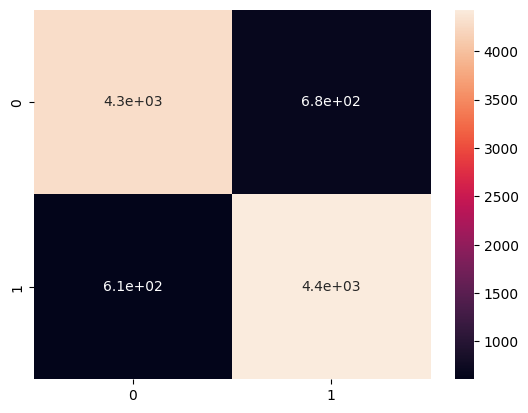

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
import seaborn as sns
sns.heatmap(cm, annot=True)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
dt = DecisionTreeClassifier()

In [ ]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = dt.predict(X_test)
y_pred

array(['negative', 'positive', 'negative', ..., 'positive', 'negative',
       'positive'], dtype=object)

In [ ]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 0.724


<Axes: >

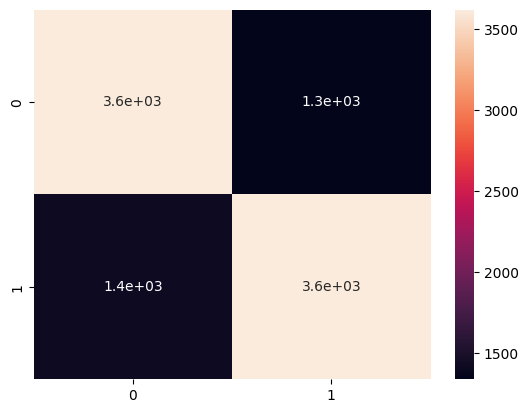

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

import seaborn as sns
sns.heatmap(cm, annot=True)

In [ ]:
cm

array([[3620, 1341],
       [1419, 3620]])